# Linear Regression

Refer to "Dive into Deep Learning" Section 3.1 https://d2l.ai/chapter_linear-regression/linear-regression.html#linear-regression-as-a-neural-network

Basic linear regression is models of the form: $y=M^Tx+b$, where $M$ is a vector of coefficients and $b$ is a constant scalar bias. The goal is to find vector M and bias b to best recreate input data.

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)

## Loss Functions
To define "best" we need some notion of error. In this case we use a loss function, which quantifies the distance between the real and predicted values of our data. Usually this is nonnegative, and the value of the loss $l$ approaches 0 as the approximation is more accurate. The most common loss in regression is the mean-squared error, or MSE: $l(M,b)=\frac{1}{2}(y_{pred}-y_{real})^2$. The 1/2 term is not necessary, but is convenient for taking the loss derivative. When training, we average or sum the losses over an entire training set

In [2]:
def MSE(predicted,real):
    return np.mean(0.5*(predicted-real)**2)

test_mse_pred = np.ones(5)+2
test_mse_real = np.ones(5)
test_mse_error = MSE(test_mse_pred,test_mse_real)
print('MSE is %f, should be 2'%(test_mse_error))

MSE is 2.000000, should be 2


## Synthetic Data
Here we generate some fake data that we want to fit a linear model to. We do this by starting with a truth line, then adding noise from the standard normal distribution

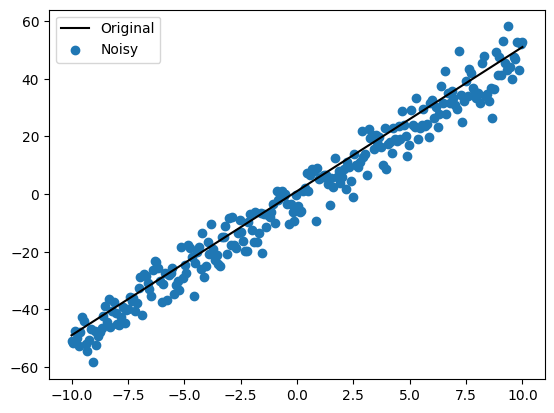

In [3]:
def linear_model(x,m=5,b=1):
    return m*x + b
x = np.linspace(-10,10,num=256)
y_line = linear_model(x)

scale = 5
noise = scale*rng.standard_normal(len(x))-(scale/2)
y_noisy = noise+y_line

plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.legend()

## Analytic Solution
Unlike most neural network problems, linear regression has an analytic solution. It is $W^* = (X^TX)^{-1}X^Ty$, where $X$ is the design matrix consisting of all data points plus an additional column of all 1's. Note that this solution only works if $X^TX$ is invertible.

m = 4.956160, b = -1.490532
MSE: 12.765128


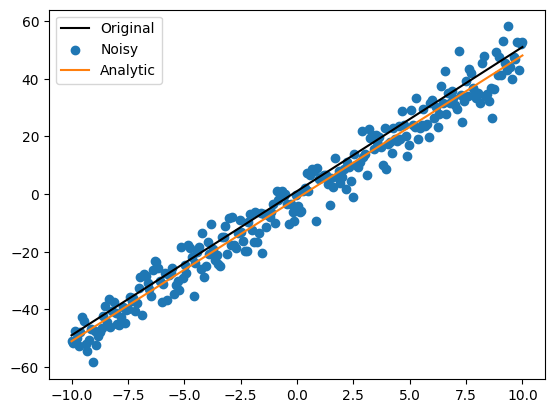

In [4]:
X = np.hstack((x[np.newaxis].T,np.ones([len(x),1])))
w_star = np.linalg.inv(X.T@X)@X.T@y_noisy
print('m = %f, b = %f'%(w_star[0],w_star[1]))
y_predicted = linear_model(x,m=w_star[0],b=w_star[1])
error = MSE(y_predicted, y_noisy)
print('MSE: %f'%error)

plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.plot(x,y_predicted, color='C1', label='Analytic')
plt.legend()

## Stochastic Gradient Descent
Although it is fairly trivial to solve this problem analytically, for more complicated things we will need an optimizer. In this case we use Stochastic Gradient Descent (SGD), which is an approximation of gradient descent. Instead of evaluating the error on all of the test samples, we instead sample over a smaller minibatch (usually a power of 2) of the original data, and update the parameters by the gradient w.r.t. the error over the minibatch, multiplied by a learning rate.

In [5]:
def SGD(x, y_real, minibatch_size=32, learning_rate=0.001, num_iter=1000):
    m = rng.random()
    b = rng.random()

    for i in range(num_iter):
        minibatch = rng.choice(minibatch_size, replace=False)
        if i == 0:
            loss = [MSE(m*x[minibatch] + b, y_real[minibatch])]
        else:
            loss.append(MSE(m*x[minibatch] + b, y_real[minibatch]))
        m -= learning_rate*np.mean(x[minibatch]*(m*x[minibatch] + b - y_real[minibatch]))
        b -= learning_rate*np.mean(m*x[minibatch] + b - y_real[minibatch])
    return m,b,loss



m: 5.340292, b: 0.236991


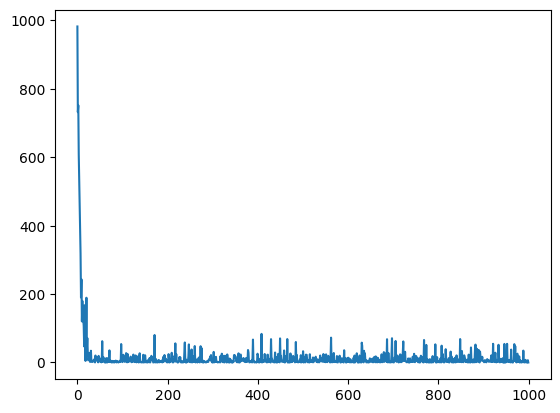

In [6]:
m_pred, b_pred, loss = SGD(x, y_noisy)
print('m: %f, b: %f'%(m_pred, b_pred))
plt.figure()
plt.plot(loss)

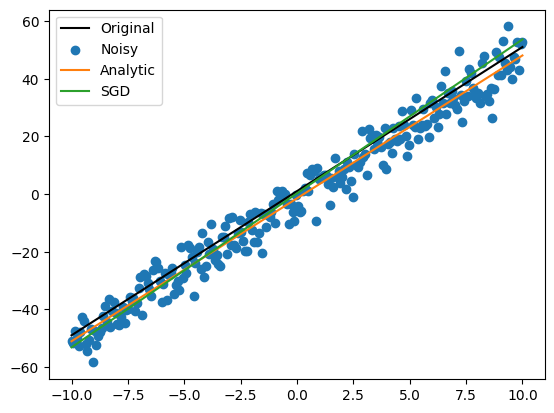

In [7]:
plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.plot(x,y_predicted, color='C1', label='Analytic')
plt.plot(x,linear_model(x,m=m_pred, b=b_pred), color='C2', label='SGD')
plt.legend()